# An Introduction to Combining Data with Pandas' merge, join, and concat

In [ ]:
# Links Used in this tutorial
# https://github.com/realpython/materials/blob/master/introduction-combining-data-pandas-merge-join-and-concat/pandas_merge.ipynb
# https://realpython.com/pandas-merge-join-and-concat/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#

# How to combine DataFrames in Pandas | Merge, Join, Concat, & Append
# https://www.youtube.com/watch?v=wzN1UyfRSWI&t=621s

In [8]:
import pandas as pd
pd.set_option('display.max_columns', 50)

## Importing Data

In [14]:
climate_temp = pd.read_csv("./Data/climate_temp.csv")
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15


In [15]:
climate_temp.shape

(127020, 21)

In [16]:
climate_precip = pd.read_csv("./Data/climate_precip.csv")
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [17]:
climate_precip.shape

(151110, 29)

## merge()
In this section, you will learn about merge() functionality in Pandas.

## Inner Join

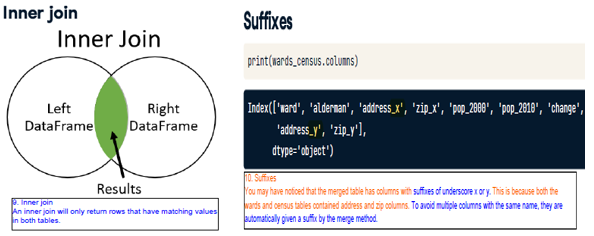

In [18]:
precip_one_station = climate_precip[climate_precip["STATION"] == "GHCND:USC00045721"]
precip_one_station.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


In [19]:
precip_one_station.shape

(365, 29)

In [21]:
inner_merged = pd.merge(precip_one_station, climate_temp)
inner_merged.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


In [22]:
# How many rows do you think this merged DataFrame has?

inner_merged.shape

(365, 47)

In [ ]:
"""
You get 365 rows because any non-matching rows are discarded in an inner 
join, which is the default merge method for merge() call, & precip_one_station 
had only 365 rows.

"""

In [ ]:
"""
What if you want to merge both full datasets, but specify which columns to 
join on? In this case, you will use the on parameter:

"""

In [23]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [24]:
inner_merged_total.shape

(123005, 48)

## Outer Join

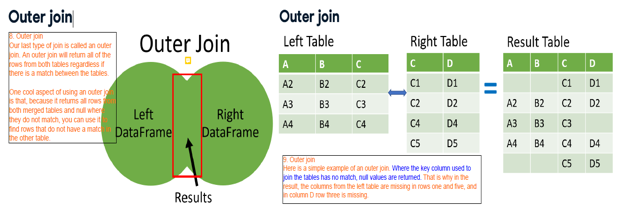

In [ ]:
# With the outer join, you will retain rows that don't have matches as well. 

In [25]:
outer_merged = pd.merge(precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"])
outer_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666.0,-66.6,0.16,-666.0,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666.0,-66.6,0.17,-666.0,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


In [26]:
outer_merged.shape

(127020, 48)

In [ ]:
"""
If you remember from when you checked the .shape attribute of climate_temp, 
you'll see that the number of rows in outer_merged matches that. With an 
outer join, you can expect to have the same number of rows as the larger 
DataFrame, since none are lost like they are in an inner join.

"""

## Left Join

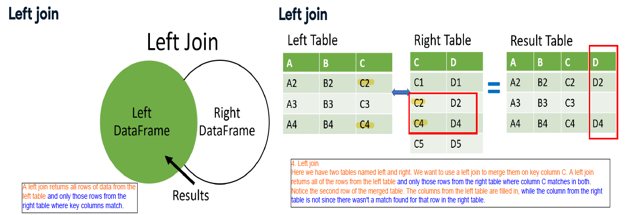

In [ ]:
"""
 In this join, you will retain rows that don't have matches only on the 
 left (or first) DataFrame to be merged.
"""

In [27]:
left_merged = pd.merge(climate_temp, precip_one_station, how="left", on=["STATION", "DATE"])
left_merged.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
left_merged.shape

(127020, 48)

In [ ]:
"""
Here, you see that the number of rows in the resulting DataFrame matches 
that of the rows in the climate_temp DataFrame. What if we switched the 
positions of the two DataFrames that we are merging?

"""

In [29]:
left_merged_reversed = pd.merge(precip_one_station, climate_temp, how="left", on=["STATION", "DATE"])
left_merged_reversed.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


In [30]:
left_merged_reversed.shape

(365, 48)

## Right Join

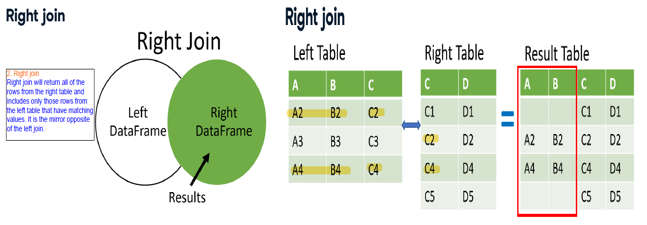

In [ ]:
"""
This works the same as the left join, however non-matching rows are only 
retained in the right DataFrame.

"""

In [31]:
right_merged = pd.merge(precip_one_station, climate_temp, how="right", on=["STATION", "DATE"])
right_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,NaN,20100101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,NaN,20100102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,NaN,20100103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,NaN,20100104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,NaN,20100105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15


In [33]:
right_merged.shape

(127020, 48)

## .join()

In [ ]:
"""
.join() uses merge() under the hood, but provides a much more simplified 
interface to merge() and by default joins on indexes. Here is an introductory 
example using the lsuffix and rsuffix parameters to handle overlapping 
column names.

"""

In [35]:
precip_one_station.join(climate_temp, lsuffix="_left", rsuffix="_right").head()

,STATION_left,STATION_NAME_left,DATE_left,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_right,STATION_NAME_right,ELEVATION,LATITUDE,LONGITUDE,DATE_right,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100101,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100102,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100103,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100104,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100105,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


In [ ]:
"""
If you inspect the data, you'll see that overlapping columns are kept, just 
renamed to be unique. If we flip this around and instead call .join() on the
larger DataFrame, you'll notice that the DataFrame is larger, but data that 
doesn't exist in the smaller DataFrame (precip_one_station) is filled in 
with NaN (Not a Number) values.


"""

In [37]:
climate_temp.join(precip_one_station, lsuffix="_left").head()

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
If you must use join() and want to merge the columns, you must set them to 
be indexes first. First take look at this previously used merge() operation:


"""

In [38]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [39]:
inner_joined_total = climate_temp.join(climate_precip.set_index(["STATION", "DATE"]), lsuffix="_x", rsuffix="_y", on=["STATION", "DATE"])
inner_joined_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""

Because .join() works on indexes, if we want to recreate merge() before, 
then we must set indexes on the join columns we specify. In this example, 
you used the .set_index() method to set your indexes to key columns within 
the join.

"""

In [ ]:
"""
... Below you will see an almost-bare .join() call. Because there are 
overlapping columns, you will have to specify a suffix with lsuffix, rsuffix, 
or both, but this example will demonstrate the more typical behavior of 
.join().
"""

In [40]:
inner_joined_bare_total = climate_temp.join(climate_precip, lsuffix="_left", rsuffix="_right")
inner_joined_bare_total.head()

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_right,STATION_NAME_right,DATE_right,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [42]:
climate_temp.join(climate_precip, lsuffix="_left", rsuffix="_right").head()

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_right,STATION_NAME_right,DATE_right,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


## concat()

In [44]:
# First, you will see a basic concatenation along axis 0.

pd.concat([precip_one_station, precip_one_station]).head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


In [45]:
# To reset the index, use the ignore_index optional parameter.

pd.concat([precip_one_station, precip_one_station], ignore_index=True).head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


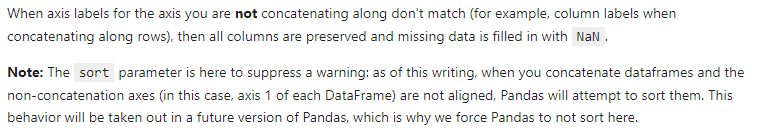

In [47]:
pd.concat([climate_precip, climate_temp], sort=False).head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
pd.concat([climate_temp, climate_precip], join="inner").head()

,STATION,STATION_NAME,DATE
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105


In [55]:
pd.concat([climate_temp, climate_precip], axis=1, join="inner").head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


### Concatenating using append

In [ ]:
"""
You can also use the keys parameter to set hierarchical axis labels which 
can be used, for example, to preserve original labels while maintaining 
labels that tell you which dataset each row or column came from.

"""

In [54]:
pd.concat([climate_temp, climate_precip], keys=["temp", "precip"], sort=False).head()

STATION            STATION_NAME ELEVATION  LATITUDE  \
temp 0  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     1  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     2  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     3  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     4  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   

         LONGITUDE      DATE  DLY-CLDD-BASE45  DLY-CLDD-BASE50  \
temp 0  -116.03694  20100101              6.0              2.0   
     1  -116.03694  20100102              6.0              2.0   
     2  -116.03694  20100103              6.0              2.0   
     3  -116.03694  20100104              6.0              2.0   
     4  -116.03694  20100105              6.0              2.0   

        DLY-CLDD-BASE55  DLY-CLDD-BASE57  DLY-CLDD-BASE60  DLY-CLDD-NORMAL  \
temp 0          -7777.0          -7777.0          -7777.0              0.0   
     1              1.0          -7777.0          -7777.0              0.0   
     2              1.0          -7777.0          -7777.0              0.0   
     3              1.0          -7777.0          -7777.0              0.0   
     4              1.0          -7777.0          -7777.0              0.0   

        DLY-CLDD-BASE70  DLY-CLDD-BASE72  DLY-HTDD-BASE40  DLY-HTDD-BASE45  \
temp 0              0.0              0.0          -7777.0              1.0   
     1              0.0              0.0          -7777.0              1.0   
     2              0.0              0.0          -7777.0              1.0   
     3              0.0              0.0          -7777.0              1.0   
     4              0.0              0.0          -7777.0          -7777.0   

        DLY-HTDD-BASE50  DLY-HTDD-BASE55  DLY-HTDD-BASE57  DLY-HTDD-BASE60  \
temp 0              2.0              6.0              7.0             10.0   
     1              2.0              6.0              7.0             10.0   
     2              2.0              5.0              7.0             10.0   
     3              2.0              5.0              7.0             10.0   
     4              2.0              5.0              7.0             10.0   

        DLY-HTDD-NORMAL  DLY-PRCP-25PCTL  DLY-SNWD-25PCTL  DLY-SNOW-25PCTL  \
temp 0             15.0              NaN              NaN              NaN   
     1             15.0              NaN              NaN              NaN   
     2             15.0              NaN              NaN              NaN   
     3             15.0              NaN              NaN              NaN   
     4             15.0              NaN              NaN              NaN   

        DLY-PRCP-50PCTL  DLY-SNWD-50PCTL  DLY-SNOW-50PCTL  DLY-PRCP-75PCTL  \
temp 0              NaN              NaN              NaN              NaN   
     1              NaN              NaN              NaN              NaN   
     2              NaN              NaN              NaN              NaN   
     3              NaN              NaN              NaN              NaN   
     4              NaN              NaN              NaN              NaN   

        DLY-SNWD-75PCTL  DLY-SNOW-75PCTL  MTD-PRCP-NORMAL  MTD-SNOW-NORMAL  \
temp 0              NaN              NaN              NaN              NaN   
     1              NaN              NaN              NaN              NaN   
     2              NaN              NaN              NaN              NaN   
     3              NaN              NaN              NaN              NaN   
     4              NaN              NaN              NaN              NaN   

        YTD-PRCP-NORMAL  YTD-SNOW-NORMAL  DLY-PRCP-PCTALL-GE001HI  \
temp 0              NaN              NaN                      NaN   
     1              NaN              NaN                      NaN   
     2              NaN              NaN                      NaN   
     3              NaN              NaN                      NaN   
     4              NaN

In [ ]:
"""
Finally, here's the first concat() example rewritten to use the .append() 
call instead.
"""

In [53]:
precip_one_station.append(precip_one_station).head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


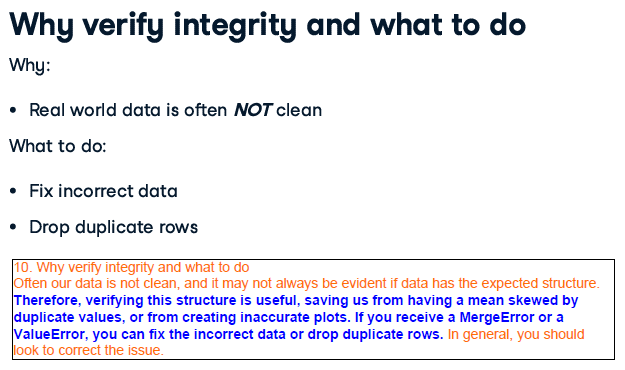